# Name :- Naman Limani
# Email-id :- nl2833@nyu.edu
# Net ID :- nl2833
# Assignment 1 

# Multivariate Normal Distribution

In [1]:
#Importing the Libraries
import torch
import matplotlib.pyplot as plt

In [2]:
#Setting the  mean vectors 
mean_a = torch.tensor([-0.5,-0.5]) # Mean distribution for A
mean_b = torch.tensor([0.5,0.5]) # Mean distribution for B


In [3]:
# Setting the covariance metric shared by both mean_a and mean_b
Covariance_matirx = torch.tensor([[1,0.25],[0.25,1]])
Covariance_matirx

tensor([[1.0000, 0.2500],
        [0.2500, 1.0000]])

In [4]:
#Defining Number of samples 
samples =1000 

In [5]:
#Using Singular Value Decomposition (SVD) to generate samples for the distribution
# Function to generate samples using SVD
def generate_bivariate_samples(mean, cov, num_samples):
    # Perform SVD on the covariance matrix
    U, S, V = torch.svd(cov)
    
    # Generate standard normal samples (num_samples x 2)
    Z = torch.randn(num_samples, 2)
    
    # Transform using the SVD components (U @ sqrt(S) @ Z^T + mean)
    S_sqrt = torch.sqrt(S)
    X = (U @ torch.diag(S_sqrt) @ Z.T).T + mean
    return X

In [6]:
# Assigning sample to each distribution 
a_distribution = generate_bivariate_samples(mean_a,Covariance_matirx,samples)
b_distribution = generate_bivariate_samples(mean_b,Covariance_matirx,samples)
X = torch.cat((a_distribution, b_distribution), dim=0)

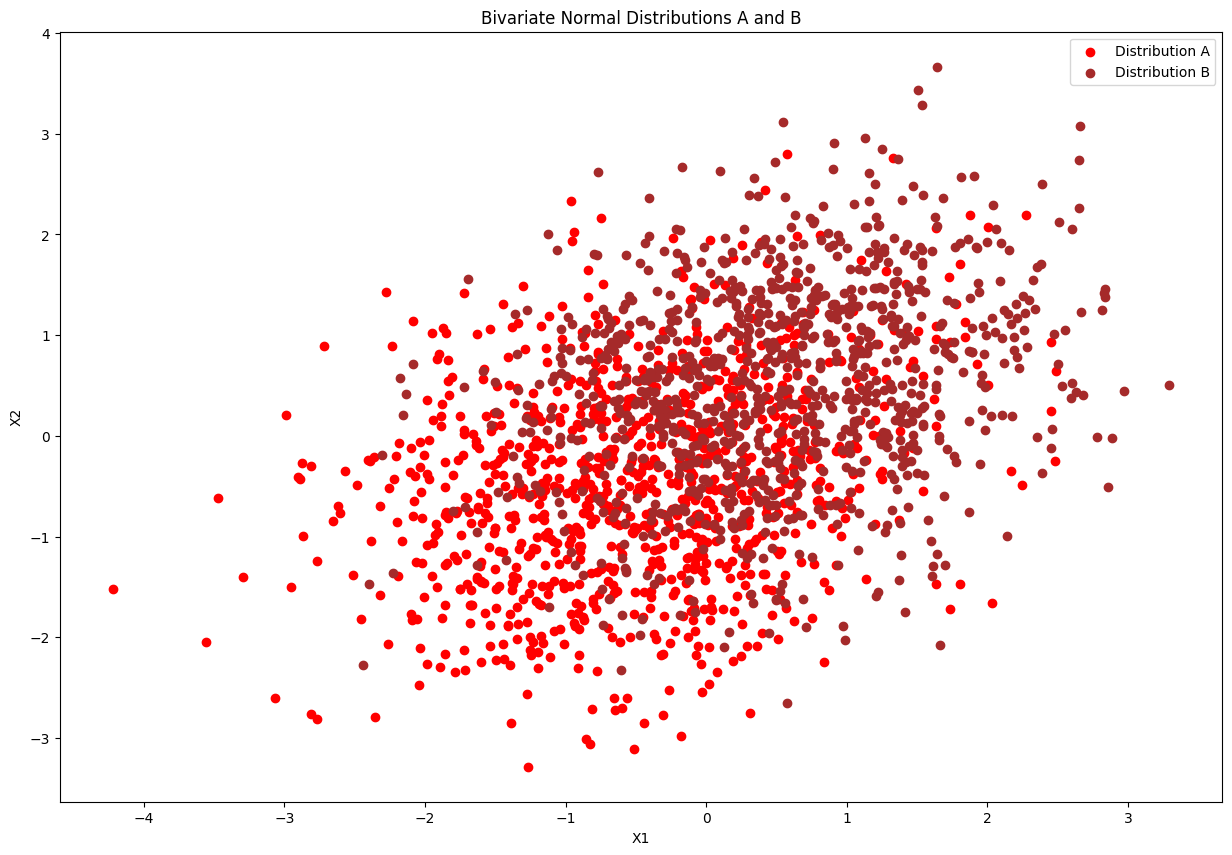

In [7]:
# Plotting the samples from both distributions using matplotlib
plt.figure(figsize=(15, 10))
plt.scatter(a_distribution[:, 0], a_distribution[:, 1], color='red', alpha=1, label='Distribution A')
plt.scatter(b_distribution[:, 0], b_distribution[:, 1], color='brown', alpha=1, label='Distribution B')
plt.title('Bivariate Normal Distributions A and B')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(False)
plt.show()

# Stack the samples from A and B into a single tensor
distri = torch.vstack([a_distribution, b_distribution])

In [8]:
print(f'Shape of combined Distribution is {distri.shape}')

Shape of combined Distribution is torch.Size([2000, 2])


# K-Means

In [9]:
# Scaling the data inorder to increase the consistency across the features
# The data is scaled between 1-11 inorder to understand he range and distribution of values
def scale_data(data):
    min_values = data.min(dim=0)[0]  # Minimum values for each feature
    max_values = data.max(dim=0)[0]  # Maximum values for each feature
    return (data - min_values) / (max_values - min_values) * 10 + 1  #rescalling the scale to [1,11]

In [10]:
#Scaling the output of multivariate data as an input to K-means
normalized_samples = scale_data(distri)

In [11]:
#Creating a function to intialise centroids randomly from the dataset
def random_initialize_centroids(data, k):
    random_indices = torch.randperm(data.size(0))[:k]  # Randomly permute and pick k indices
    return data[random_indices]  

In [12]:
#Creating the function to assign each data to the nearest centroid
def get_labels(data, centroids):
    distances = torch.cdist(data, centroids)  # calculating the distance between datapoints and centroids
    return torch.argmin(distances, dim=1)  # Assigning the datapoints to nearest centroid

In [13]:
# Creating a function to calculate new centroids as the mean of the points assigned to each cluster 
def compute_new_centroids(data, labels, k):
    return torch.stack([data[labels == cluster].mean(dim=0) for cluster in range(k)])

In [14]:
# Assigning the parametrs to the K-Means and Initialising the centroids
k = 4  # Number of clusters
max_iters = 1000  # Maximum number of iterations
# Initialising centroids
centroids = random_initialize_centroids(normalized_samples, k)

In [15]:
# Calculating K-Means Clustering
for i in range(max_iters):
    prev_centroids = centroids.clone()  # Save previous centroids
    labels = get_labels(normalized_samples, centroids)  # Assign labels to data points
    centroids = compute_new_centroids(normalized_samples, labels, k)  # Update centroids

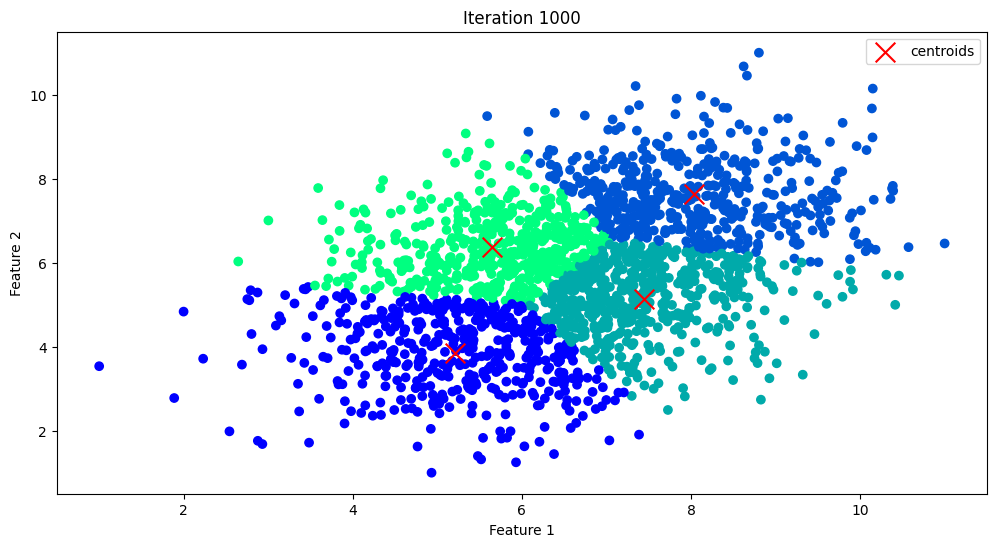

In [16]:
# Visualizating the clustering the process by plotting data points and centroid every 10 iterations giving insights into K-Means algorithm 
if (i + 1) % 10 == 0: #The line ensures that plotting takes places after every 10 iteration , which helps us to visualise the output without overwhelming the output with too many plots   
    plt.figure(figsize=(12, 6))
    plt.scatter(normalized_samples[:, 0], normalized_samples[:, 1], c=labels, cmap='winter', alpha=1) #scatter plot for data points
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x',label='centroids')#scatter plot for centroids
    plt.title(f'Iteration {i + 1}') #i+1 to start the iteration from 1 instead of 0
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

In [17]:
#Printing the final centroids and also iteration at which the algorithm converge  
if torch.allclose(centroids, prev_centroids, atol=1e-4):
    print(f'Converged after {i + 1} iterations')

# Final centroids and label counts
print("Final centroids:\n", centroids)
#print("Label distribution:\n", torch.bincount(labels))
    

Converged after 1000 iterations
Final centroids:
 tensor([[5.2030, 3.8532],
        [8.0302, 7.6456],
        [7.4465, 5.1395],
        [5.6466, 6.3763]])


# Principal Component Analysis

In [18]:
# Generating random data with 100 rows and 4 columns , where each entry is sample from mean=0 and standard deviation=1  
obj = torch.normal(0, 1, (100, 4))
#This line creates columns 2 and 3 in obj as linear combination od 0 and 1 columns and add some Gaussian noise  
obj[:, 2] = 3 * obj[:, 0] - 2 * obj[:, 1] + torch.normal(0, 0.1, (100,))
obj[:, 3] = 1.5 * obj[:, 0] - 0.5 * obj[:, 1] + torch.normal(0, 0.1, (100,))

In [19]:
#Subtracting the mean of each feature from that feature for centering the data 
obj = obj - torch.mean(obj, dim=0)

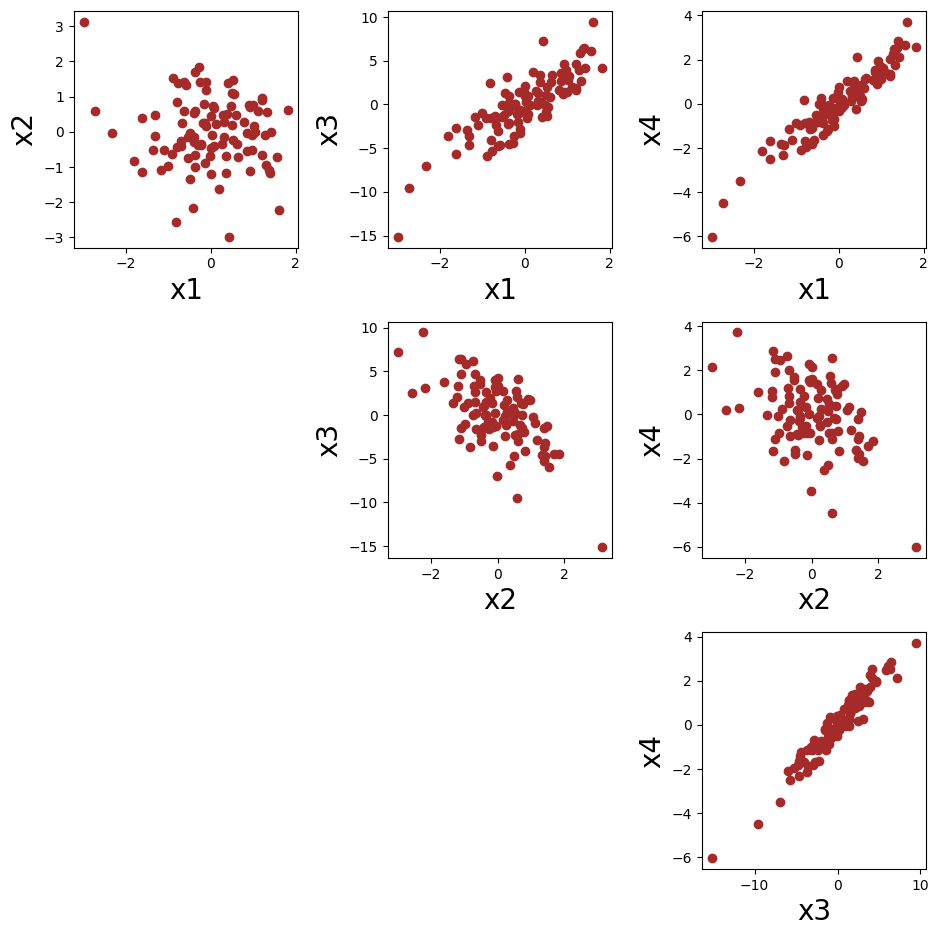

In [20]:
# Plotting the data
plt.figure(figsize=(12, 12))
for i in range(4):
    for j in range(4):
        if j > i:
            plt.subplot(4, 4, i * 4 + j + 1)
            plt.scatter(obj[:, i].numpy(), obj[:, j], color='brown')
            plt.xlabel(f'x{i+1}', fontsize=20)
            plt.ylabel(f'x{j+1}', fontsize=20)
plt.tight_layout()
plt.show()

In [21]:
# Perform PCA on the datapoints 
# Calculating the covariance matrix
cov_matrix = torch.mm(obj.T, obj) / (obj.size(0) - 1)
print(cov_matrix)

tensor([[ 0.8775, -0.1052,  2.8456,  1.3761],
        [-0.1052,  0.9689, -2.2512, -0.6549],
        [ 2.8456, -2.2512, 13.0553,  5.4409],
        [ 1.3761, -0.6549,  5.4409,  2.4199]])


In [22]:
# Deriving the eigenvalues and eigenvectors
eigenvalues, eigenvectors = torch.linalg.eigh(cov_matrix)
print(eigenvalues)
print(eigenvectors)

tensor([7.2742e-04, 9.8303e-03, 9.6220e-01, 1.6349e+01])
tensor([[ 0.8312, -0.1705,  0.4905, -0.1987],
        [-0.4980, -0.3112,  0.7957,  0.1481],
        [-0.2205, -0.3739, -0.1181, -0.8931],
        [-0.1117,  0.8569,  0.3351, -0.3755]])


In [23]:
# Sorting eigenvalues and eigenvectors in descending order
eigenvalues, indices = torch.sort(eigenvalues, descending=True)
#Reordering the coloumns of eigenvectors based on indices tensor for arranging it according to their assoiated eigenvalues 
eigenvectors = eigenvectors[:, indices]


In [24]:
# Swapping the rowa and columns of the eigenvector
principal_comps = eigenvectors.T
# Print each principal component
for i, component in enumerate(principal_comps):
    print(f'Principal component {i+1}')
    print(component)
    print()

Principal component 1
tensor([-0.1987,  0.1481, -0.8931, -0.3755])

Principal component 2
tensor([ 0.4905,  0.7957, -0.1181,  0.3351])

Principal component 3
tensor([-0.1705, -0.3112, -0.3739,  0.8569])

Principal component 4
tensor([ 0.8312, -0.4980, -0.2205, -0.1117])

